# Mirae asset

1. trade_train 데이터 살펴보기
2. stock 데이터 살펴보기
3. trade, stock 데이터 합치기
4. 그룹별 특성 알아보기 
   - 총 기간 top3 종목 추출
   - 기간별 top3 종목
5. top3 종목의 특성 알아보기
   - 주가 추세선
   - 변동성
   +
6. 전처리 및 feature 추가하기
   - 각 그룹과 top3 종목특성을 바탕으로
7. 모델 예측
8. 평가
   - 7월 top3 후보군 기준 

In [1]:
import pandas as pd
import numpy as np

> # 1. trade_train data

In [2]:
data_trade = pd.read_csv("trade_train.csv")

In [3]:
data_trade.head()

,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값
0,0,201907,MAD01,288,A000660,Y,Y,7,17,19,234,74800,78500
1,1,201907,MAD01,288,A001820,Y,Y,3,4,533,154,47385,46700
2,2,201907,MAD01,288,A004020,Y,Y,3,3,409,528,41411,40000
3,3,201907,MAD01,288,A005380,Y,Y,4,3,323,451,140602,140628
4,4,201907,MAD01,288,A005930,Y,Y,13,19,34,101,45350,46850


In [4]:
data_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30200 non-null  int64 
 1   기준년월        30200 non-null  int64 
 2   그룹번호        30200 non-null  object
 3   그룹내고객수      30200 non-null  int64 
 4   종목번호        30200 non-null  object
 5   그룹내_매수여부    30200 non-null  object
 6   그룹내_매도여부    30200 non-null  object
 7   매수고객수       30200 non-null  int64 
 8   매도고객수       30200 non-null  int64 
 9   평균매수수량      30200 non-null  int64 
 10  평균매도수량      30200 non-null  int64 
 11  매수가격_중앙값    30200 non-null  int64 
 12  매도가격_중앙값    30200 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 3.0+ MB


In [5]:
data_trade.isnull().sum()

Unnamed: 0    0
기준년월          0
그룹번호          0
그룹내고객수        0
종목번호          0
그룹내_매수여부      0
그룹내_매도여부      0
매수고객수         0
매도고객수         0
평균매수수량        0
평균매도수량        0
매수가격_중앙값      0
매도가격_중앙값      0
dtype: int64

NULL값 없음

### - 거래내역 많은 그룹순

In [6]:
data_trade["그룹번호"].value_counts()

MAD41    3036
MAD43    2841
MAD06    2748
MAD23    2385
MAD42    1555
MAD05    1434
MAD38    1307
MAD04    1272
MAD09    1136
MAD35    1071
MAD08     969
MAD46     913
MAD18     848
MAD32     810
MAD21     786
MAD37     670
MAD03     538
MAD36     388
MAD24     325
MAD29     319
MAD17     316
MAD14     314
MAD33     297
MAD30     268
MAD11     263
MAD01     249
MAD31     242
MAD44     229
MAD19     224
MAD47     223
MAD48     207
MAD22     202
MAD27     192
MAD20     187
MAD26     175
MAD45     170
MAD12     165
MAD25     128
MAD39     124
MAD02     108
MAD07      96
MAD13      92
MAD28      84
MAD16      75
MAD15      71
MAD34      54
MAD40      53
MAD10      41
Name: 그룹번호, dtype: int64

### - 그룹이름

In [7]:
group = data_trade['그룹번호'].unique()
group

array(['MAD01', 'MAD02', 'MAD03', 'MAD04', 'MAD05', 'MAD06', 'MAD07',
       'MAD08', 'MAD09', 'MAD10', 'MAD11', 'MAD12', 'MAD13', 'MAD14',
       'MAD15', 'MAD16', 'MAD17', 'MAD18', 'MAD19', 'MAD20', 'MAD21',
       'MAD22', 'MAD23', 'MAD24', 'MAD25', 'MAD26', 'MAD27', 'MAD28',
       'MAD29', 'MAD30', 'MAD31', 'MAD32', 'MAD33', 'MAD34', 'MAD35',
       'MAD36', 'MAD37', 'MAD38', 'MAD39', 'MAD41', 'MAD42', 'MAD43',
       'MAD44', 'MAD45', 'MAD46', 'MAD47', 'MAD48', 'MAD40'], dtype=object)

In [8]:
len(group)  #총48개 그룹

48

> # 2. stocks data

In [9]:
#stock 데이터 불러오기
data_stocks = pd.read_csv("stocks.csv")
data_stocks.head()

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
0,0,20190701,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,9680,9840,9680,9710,31341,30581
1,1,20190701,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,20550,20550,20200,20300,127186,258535
2,2,20190701,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,259000,267500,250000,251500,395757,10139357
3,3,20190701,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,136500,137000,133000,136000,62513,846100
4,4,20190701,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,9060,9190,8910,9000,7661,6896


In [10]:
data_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286061 entries, 0 to 286060
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          286061 non-null  int64 
 1   기준일자           286061 non-null  int64 
 2   종목번호           286061 non-null  object
 3   종목명            286061 non-null  object
 4   20년7월TOP3대상여부  286061 non-null  object
 5   시장구분           286061 non-null  object
 6   표준산업구분코드_대분류   286061 non-null  object
 7   표준산업구분코드_중분류   286061 non-null  object
 8   표준산업구분코드_소분류   286061 non-null  object
 9   종목시가           286061 non-null  int64 
 10  종목고가           286061 non-null  int64 
 11  종목저가           286061 non-null  int64 
 12  종목종가           286061 non-null  int64 
 13  거래량            286061 non-null  int64 
 14  거래금액_만원단위      286061 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 32.7+ MB


In [11]:
data_stocks.isnull().sum()

index            0
기준일자             0
종목번호             0
종목명              0
20년7월TOP3대상여부    0
시장구분             0
표준산업구분코드_대분류     0
표준산업구분코드_중분류     0
표준산업구분코드_소분류     0
종목시가             0
종목고가             0
종목저가             0
종목종가             0
거래량              0
거래금액_만원단위        0
dtype: int64

null값 없음

> # 3. trade, stock 데이터 합치기

## - 종목종류와 특성만 가져오기

stock data에는 날짜별로 시가, 종가, 거래량, 거래대금등 많은 데이터 존재

그룹별로 어떤 특징의 종목을 선호하는지 파악하기 위해 필요한 컬럼만 가져옴

In [12]:
stock_feature = data_stocks[['종목번호','종목명','20년7월TOP3대상여부','시장구분','표준산업구분코드_대분류','표준산업구분코드_중분류','표준산업구분코드_소분류']]
stock_feature = stock_feature.sort_values(by='종목번호') #종목기준으로 정렬
stock_feature = stock_feature.drop_duplicates(['종목번호']) #종목 dupicated
stock_feature.head()

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업
119392,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업
127991,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업
235021,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업
18520,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업


In [13]:
len(stock_feature) #총 1087 종목

1087

> # 4. 그룹별 특성 알아보기 

## 일단 첫번째 그룹으로 시도

In [14]:
group1 = data_trade[data_trade['그룹번호']==group[0]]

### - 총 기간 top3종목 

In [15]:
df1 = pd.DataFrame(group1.groupby(['종목번호'])['매수고객수'].sum())   # 종목별로 매수고객수의 합
df1 = df1.sort_values(by=['매수고객수'], ascending=False).head(3)     # top3
df1 = pd.merge(df1, stock_feature, on="종목번호", how="left")         # 종목특성 merge
df1

,종목번호,매수고객수,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류
0,A005930,581,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업
1,A000660,354,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업
2,A005935,211,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업


In [16]:
Total_period_top3 = df1['종목명'].tolist()
Total_period_top3

['삼성전자', 'SK하이닉스', '삼성전자우']

### - 기준년월별 top3종목

In [17]:
df2 = group1.sort_values(by="매수고객수", ascending=False).groupby("기준년월").head(3)  #'기준년월' 기준으로 grouping 한뒤 매수고객수가 가장 많은 종목 top3
df2 = df2.sort_values(['기준년월', '매수고객수'], ascending=[True, False])
df2 = df2.reset_index(drop=True)                #다시 인덱싱
df2 = df2[['기준년월','종목번호','매수고객수']] #필요 column만 추출
df2 = pd.merge(df2, stock_feature, on="종목번호", how="left")  #각 종목 특성 가져옴
df2

,기준년월,종목번호,매수고객수,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류
0,201907,A066570,15,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업
1,201907,A009150,14,삼성전기,N,코스피,제조업,통신장비 제조업,전자부품 제조업
2,201907,A005930,13,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업
3,201908,A005930,26,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업
4,201908,A000660,17,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업
5,201908,A066570,12,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업
6,201909,A005930,16,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업
7,201909,A000660,12,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업
8,201909,A066570,9,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업
9,201910,A005930,19,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업


### - 각 기간별 top3 변화 확인
순위 컬럼 만들어줌 'top3'

In [18]:
date=df2['기준년월'].unique().tolist()

l=[]

for i in date :
    k=1
    for j in range(len(df2)):
        if df2.iloc[j]['기준년월']==i:
            l.append(k)
            k=k+1
            
        else:
            continue;
            
df2['top3']=l
df2

,기준년월,종목번호,매수고객수,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,top3
0,201907,A066570,15,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
1,201907,A009150,14,삼성전기,N,코스피,제조업,통신장비 제조업,전자부품 제조업,2
2,201907,A005930,13,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
3,201908,A005930,26,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
4,201908,A000660,17,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
5,201908,A066570,12,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
6,201909,A005930,16,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
7,201909,A000660,12,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
8,201909,A066570,9,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
9,201910,A005930,19,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1


##### top1 : 삼성전자 - 코스피 - 제조업

In [19]:
top1 = df2[df2['top3']==1]
top1

,기준년월,종목번호,매수고객수,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,top3
0,201907,A066570,15,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
3,201908,A005930,26,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
6,201909,A005930,16,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
9,201910,A005930,19,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
12,201911,A005930,26,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
15,201912,A005930,21,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
18,202001,A005930,45,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
21,202002,A005930,55,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
24,202003,A005930,96,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1
27,202004,A005930,77,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,1


In [20]:
top1 = pd.DataFrame(top1.groupby(['종목명'])['종목번호'].count())
top1 = top1.sort_values(by='종목번호', ascending=False)
top1.index[0]

'삼성전자'

##### top2 : SK하이닉스 - 코스피 - 제조업

In [21]:
top2 = df2[df2['top3']==2]
top2

,기준년월,종목번호,매수고객수,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,top3
1,201907,A009150,14,삼성전기,N,코스피,제조업,통신장비 제조업,전자부품 제조업,2
4,201908,A000660,17,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
7,201909,A000660,12,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
10,201910,A000660,17,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
13,201911,A000660,18,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
16,201912,A000660,20,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
19,202001,A000660,24,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
22,202002,A000660,33,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
25,202003,A000660,42,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2
28,202004,A000660,52,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,2


In [22]:
top2 = pd.DataFrame(top2.groupby(['종목명'])['종목번호'].count())
top2 = top2.sort_values(by='종목번호', ascending=False)
top2.index[0]

'SK하이닉스'

##### top3 : 삼성전자우 - 코스피 - 제조업

In [23]:
top3 = df2[df2['top3']==3]
top3

,기준년월,종목번호,매수고객수,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,top3
2,201907,A005930,13,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
5,201908,A066570,12,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
8,201909,A066570,9,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
11,201910,A066570,12,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
14,201911,A009150,9,삼성전기,N,코스피,제조업,통신장비 제조업,전자부품 제조업,3
17,201912,A066570,12,LG전자,N,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
20,202001,A005935,16,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
23,202002,A005935,23,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
26,202003,A005935,33,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3
29,202004,A005935,28,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,3


In [24]:
top3 = pd.DataFrame(top3.groupby(['종목명'])['종목번호'].count())
top3 = top3.sort_values(by='종목번호', ascending=False)
top3.index[0]

'삼성전자우'

In [25]:
By_period_top3 = [top1.index[0], top2.index[0], top3.index[0]]
By_period_top3

['삼성전자', 'SK하이닉스', '삼성전자우']

### 전체기간과 기간별 top3의 연관성

In [26]:
print(Total_period_top3)
print(By_period_top3)

['삼성전자', 'SK하이닉스', '삼성전자우']
['삼성전자', 'SK하이닉스', '삼성전자우']


총 기간의 top3와 기간별 top3는 매우 유사함

> # 5. top3에 해당하는 종목의 특성 알아보기 - stock data

- 변동성, 거래량, 거래금액 등,,,

In [27]:
data_s = data_stocks.copy()

In [28]:
df = pd.DataFrame(data=list(enumerate(data_s['기준일자'], start=1)), columns=['id','int_date'])
df[['str_date']] = df[['int_date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))
data_s['date'] = df['str_date']
data_s.head()

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위,date
0,0,20190701,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,9680,9840,9680,9710,31341,30581,07/01/2019
1,1,20190701,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,20550,20550,20200,20300,127186,258535,07/01/2019
2,2,20190701,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,259000,267500,250000,251500,395757,10139357,07/01/2019
3,3,20190701,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,136500,137000,133000,136000,62513,846100,07/01/2019
4,4,20190701,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,9060,9190,8910,9000,7661,6896,07/01/2019


#### 1. 삼성전자  (A005930)

In [29]:
data_samsung = data_s[data_s['종목명']=='삼성전자']
data_samsung.head()

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위,date
114,114,20190701,A005930,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,47350,47400,46250,46600,11383522,53156861,07/01/2019
1141,1141,20190702,A005930,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,46200,46900,45850,46250,8463073,39304819,07/02/2019
2168,2168,20190703,A005930,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,45750,46350,45200,45400,9669368,44106491,07/03/2019
3195,3195,20190704,A005930,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,45250,46200,45250,46000,6365573,29145361,07/04/2019
4222,4222,20190705,A005930,삼성전자,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,45950,45950,45250,45650,7235395,32944675,07/05/2019


20년 7월 top3대상에 듬

#### 시가, 종가

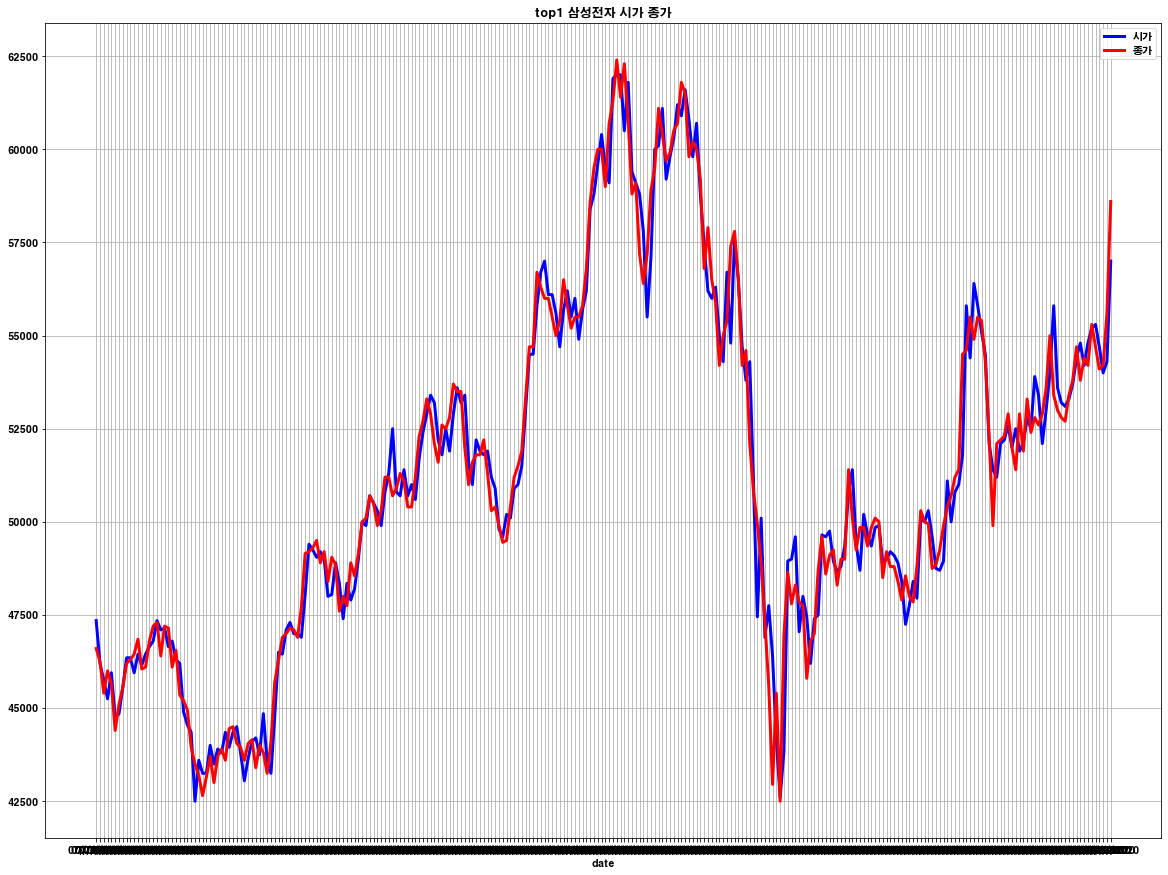

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

#한글깨짐현상
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRE.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

plt.plot(data_samsung['date'],data_samsung['종목시가'],'b',label='시가')
plt.plot(data_samsung['date'],data_samsung['종목종가'],'r',label='종가')

plt.xlabel('date')
plt.title('top1 삼성전자 시가 종가')

plt.legend(loc='upper right')

plt.show()

#### 고가, 저가

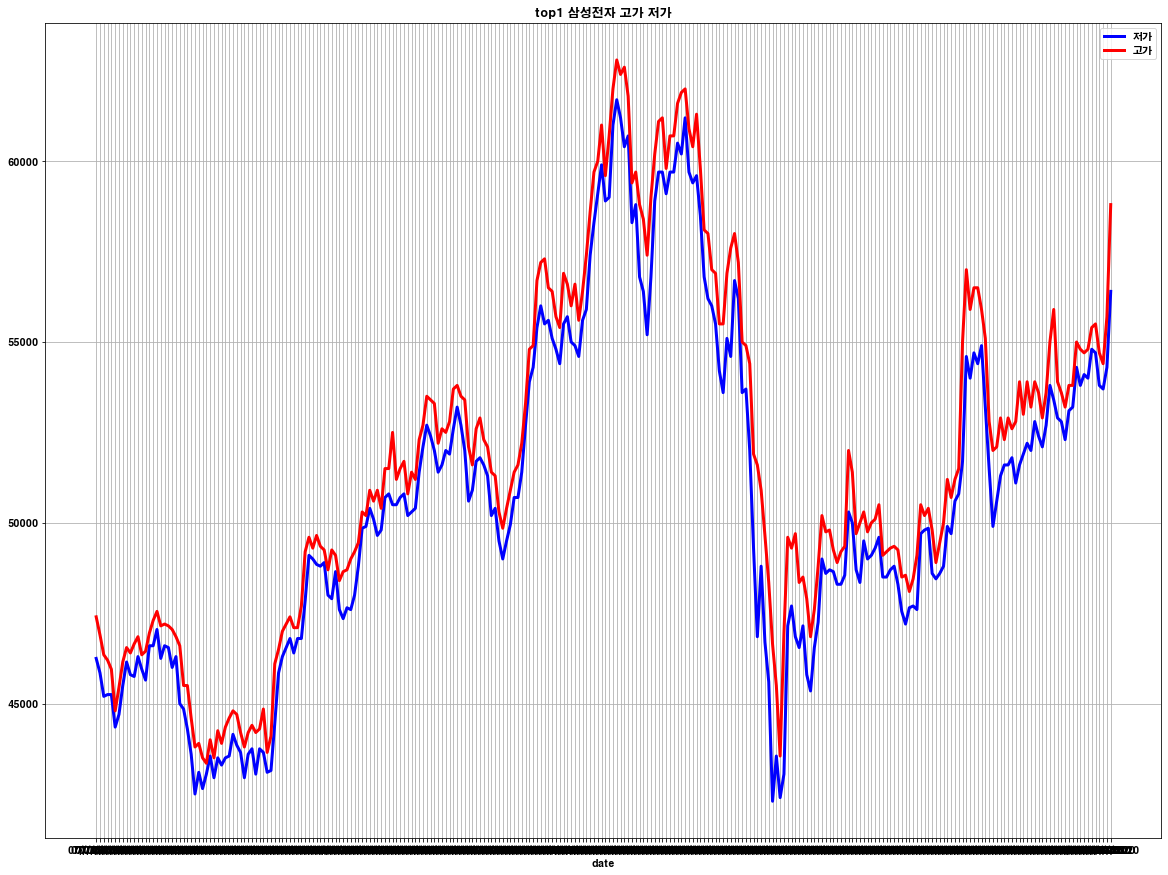

In [31]:
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

plt.plot(data_samsung['date'],data_samsung['종목저가'],'b',label='저가')
plt.plot(data_samsung['date'],data_samsung['종목고가'],'r',label='고가')

plt.xlabel('date')
plt.title('top1 삼성전자 고가 저가')

plt.legend(loc='upper right')

plt.show()

### 첫번째 그룹에서 top1안에 들지 않았을 때의 추이 확인 (LG전자와 비교)

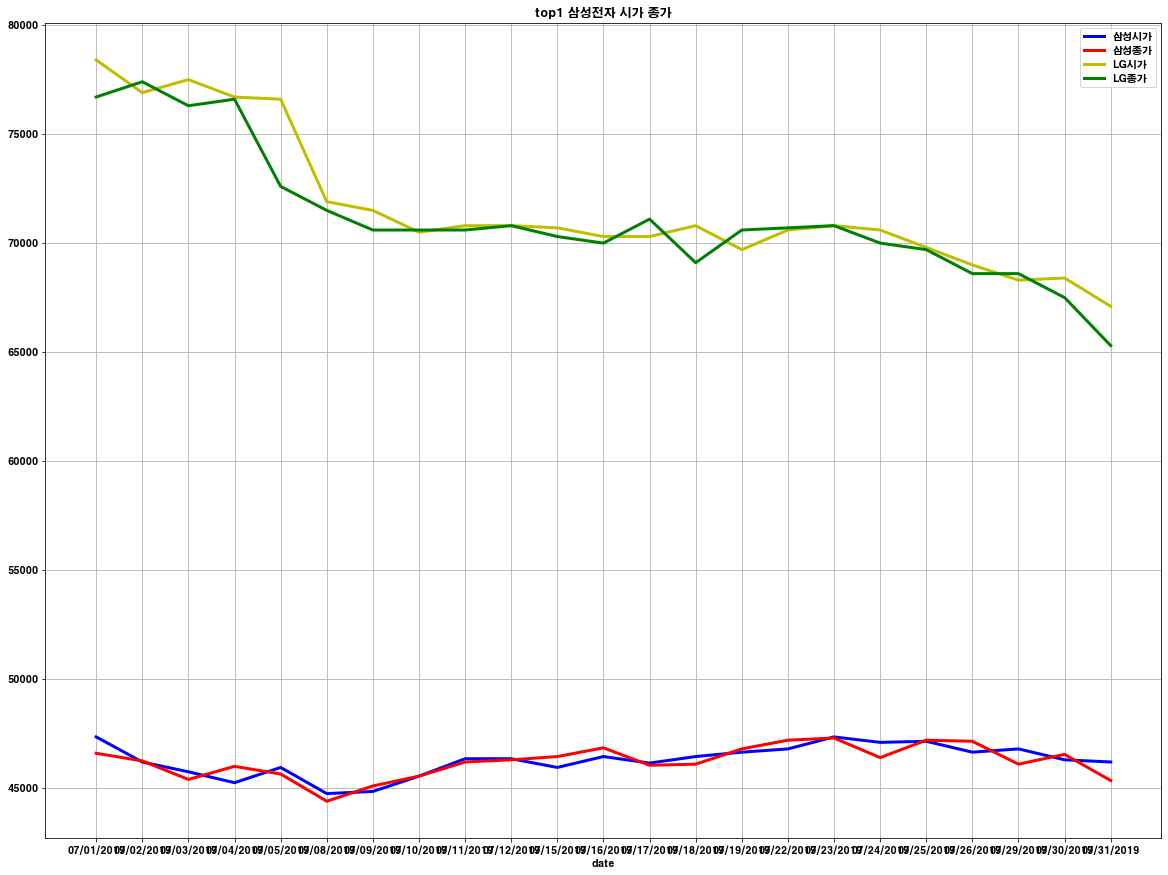

In [32]:
#비교하고 싶은 날짜로 변경
data_samsung_2 = data_samsung[(data_samsung['기준일자'] >= 20190700) & (20190731 >= data_samsung['기준일자'])]

data_LG = data_s[data_s['종목명']=='LG전자']
data_LG_2 = data_LG[(data_LG['기준일자'] >= 20190700) & (20190731 >= data_LG['기준일자'])]

plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

plt.plot(data_samsung_2['date'],data_samsung_2['종목시가'],'b',label='삼성시가')
plt.plot(data_samsung_2['date'],data_samsung_2['종목종가'],'r',label='삼성종가')
plt.plot(data_LG_2['date'],data_LG_2['종목시가'],'y',label='LG시가')
plt.plot(data_LG_2['date'],data_LG_2['종목종가'],'g',label='LG종가')

plt.xlabel('date')
plt.title('top1 삼성전자 시가 종가')

plt.legend(loc='upper right')

plt.show()

### 201907이후 추이

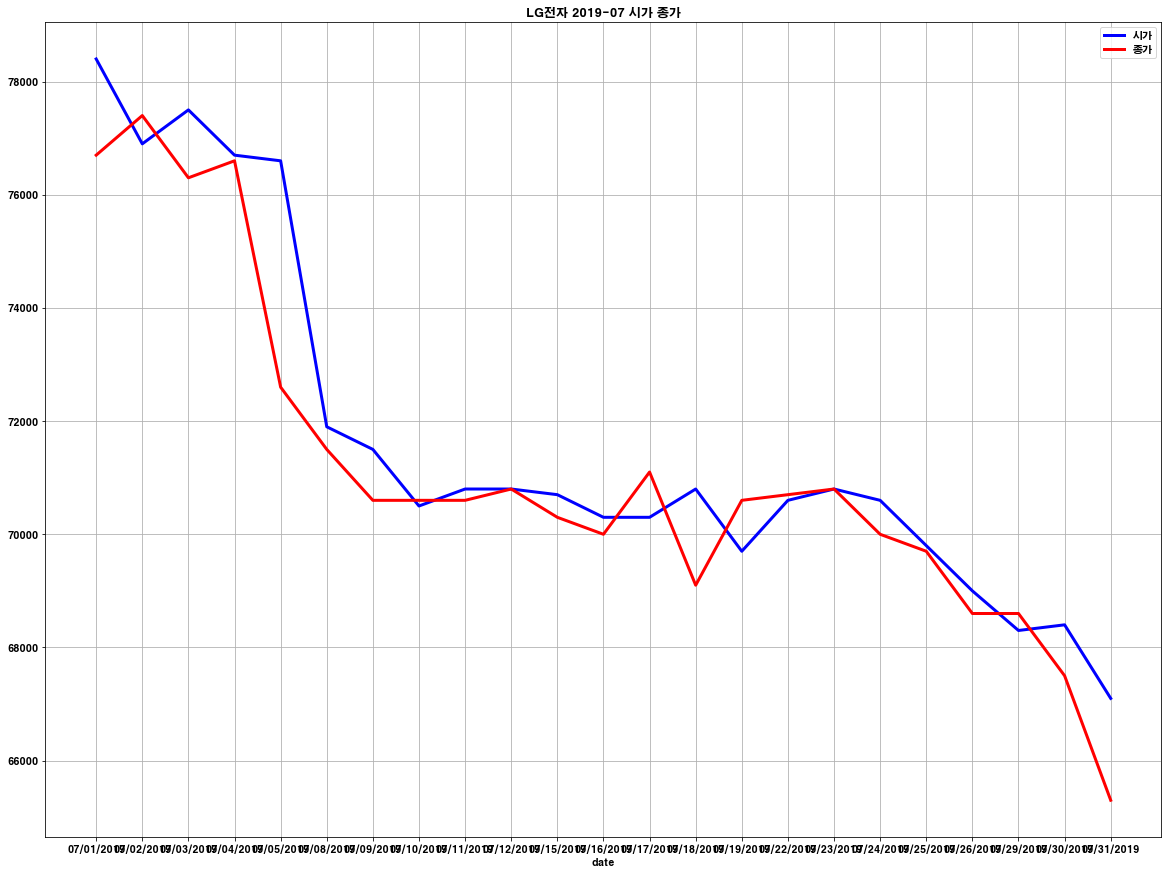

In [33]:
data_LG = data_s[data_s['종목명']=='LG전자']
data_LG_2 = data_LG[(data_LG['기준일자'] >= 20190700) & (20190731 >= data_LG['기준일자'])]

plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

plt.plot(data_LG_2['date'],data_LG_2['종목시가'],'b',label='시가')
plt.plot(data_LG_2['date'],data_LG_2['종목종가'],'r',label='종가')

plt.xlabel('date')
plt.title('LG전자 2019-07 시가 종가')

plt.legend(loc='upper right')

plt.show()

### 2. sk하이닉스 (A000660)

In [34]:
data_skh = data_s[data_s['종목명']=='SK하이닉스']
data_skh.head()

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위,date
13,13,20190701,A000660,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,71000,71000,69700,70000,3538183,24875267,07/01/2019
1040,1040,20190702,A000660,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,69700,71700,69100,71400,2495399,17691176,07/02/2019
2067,2067,20190703,A000660,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,71100,71700,69000,69100,2790684,19491897,07/03/2019
3094,3094,20190704,A000660,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,69600,70700,69300,70200,1503707,10526521,07/04/2019
4121,4121,20190705,A000660,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,70300,71000,68400,68400,2043271,14154403,07/05/2019


20년 7월 top3대상에 듬

#### 시가 종가 비교

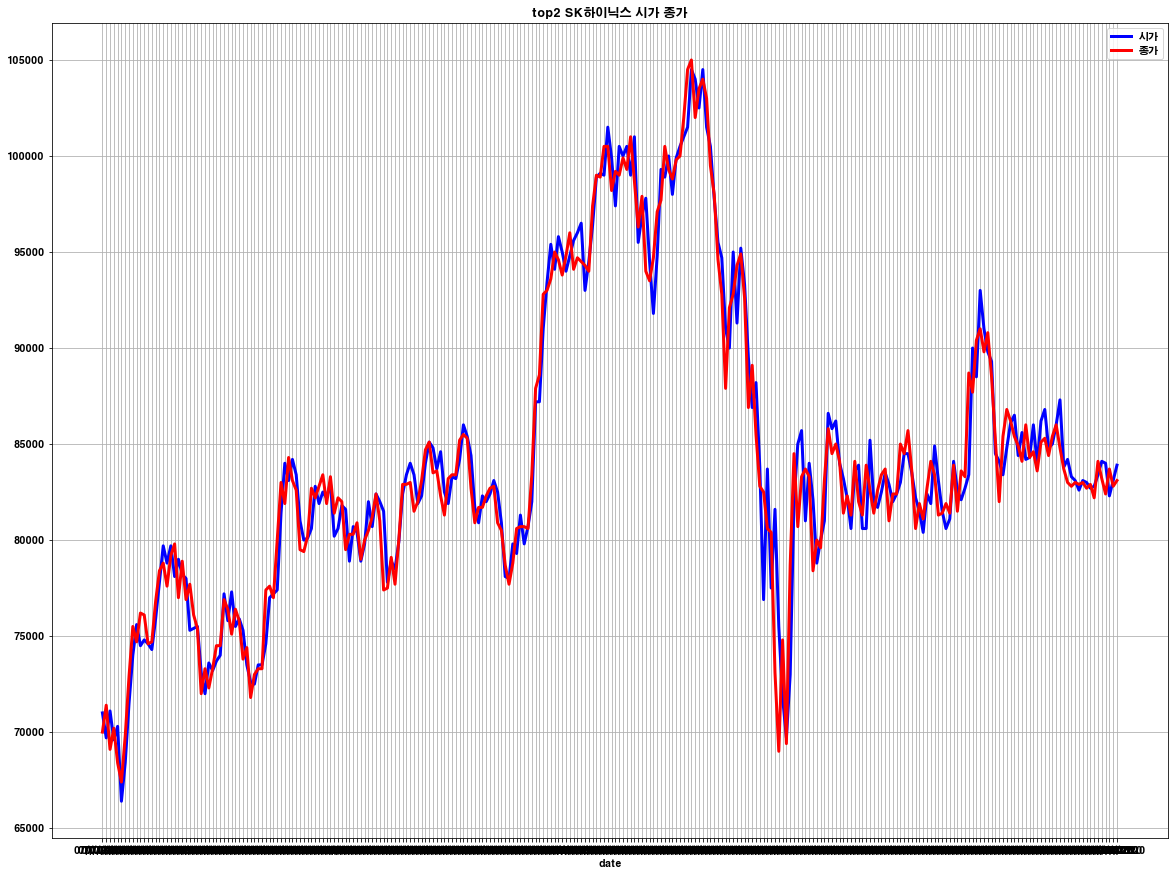

In [35]:
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

plt.plot(data_skh['date'],data_skh['종목시가'],'b',label='시가')
plt.plot(data_skh['date'],data_skh['종목종가'],'r',label='종가')

plt.xlabel('date')
plt.title('top2 SK하이닉스 시가 종가')

plt.legend(loc='upper right')

plt.show()

#### 고가 저가 비교

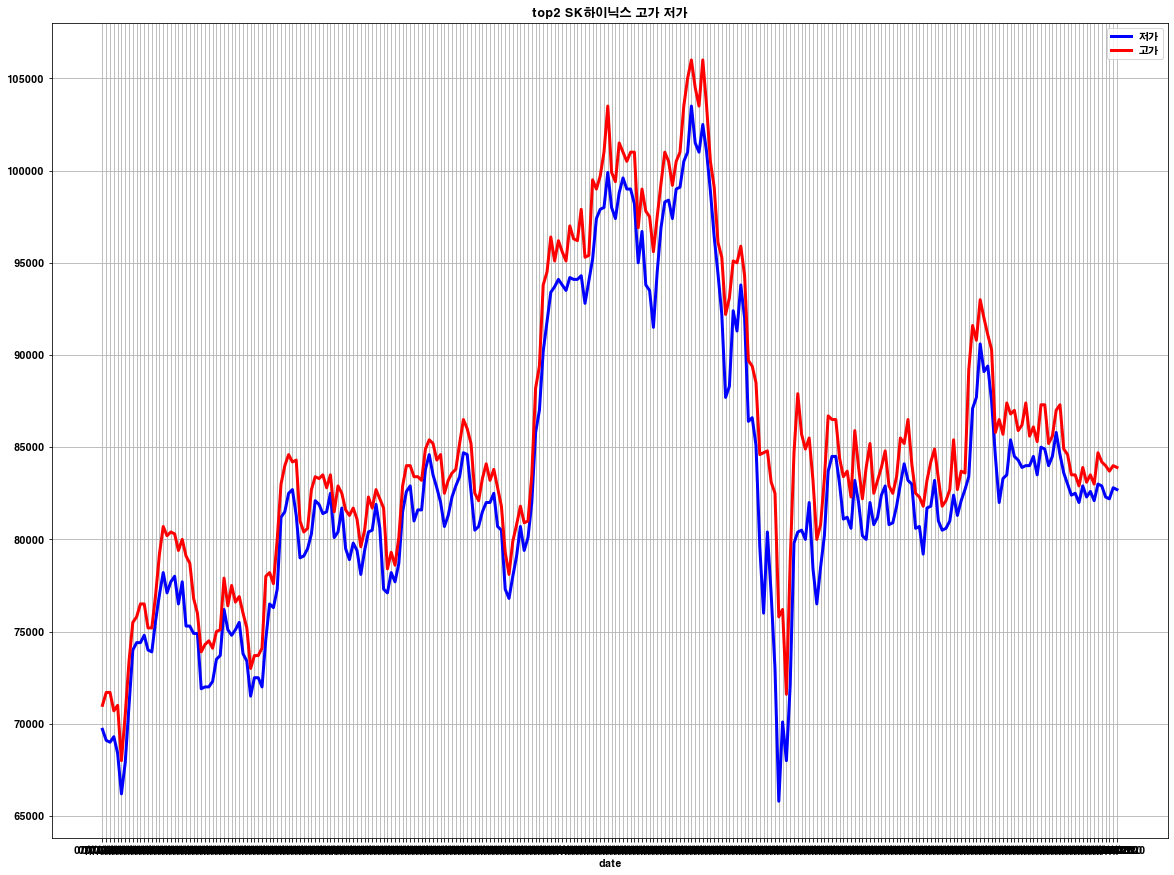

In [36]:
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

plt.plot(data_skh['date'],data_skh['종목저가'],'b',label='저가')
plt.plot(data_skh['date'],data_skh['종목고가'],'r',label='고가')

plt.xlabel('date')
plt.title('top2 SK하이닉스 고가 저가')

plt.legend(loc='upper right')

plt.show()

### 3. 삼성전자우 (A005935)

In [37]:
data_samsungu = data_stocks[data_stocks['종목명']=='삼성전자우']
data_samsungu.head()

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
115,115,20190701,A005935,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,38300,38500,38000,38350,836761,3202218
1142,1142,20190702,A005935,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,37950,38350,37600,38150,746740,2838499
2169,2169,20190703,A005935,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,37400,38050,37400,37800,1182527,4455371
3196,3196,20190704,A005935,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,37500,38150,37500,38000,475720,1803531
4223,4223,20190705,A005935,삼성전자우,Y,코스피,제조업,통신장비 제조업,통신 및 방송 장비 제조업,38000,38000,37150,37350,637309,2384046


20년 7월 top3대상에 듬

#### 시가 종가 비교

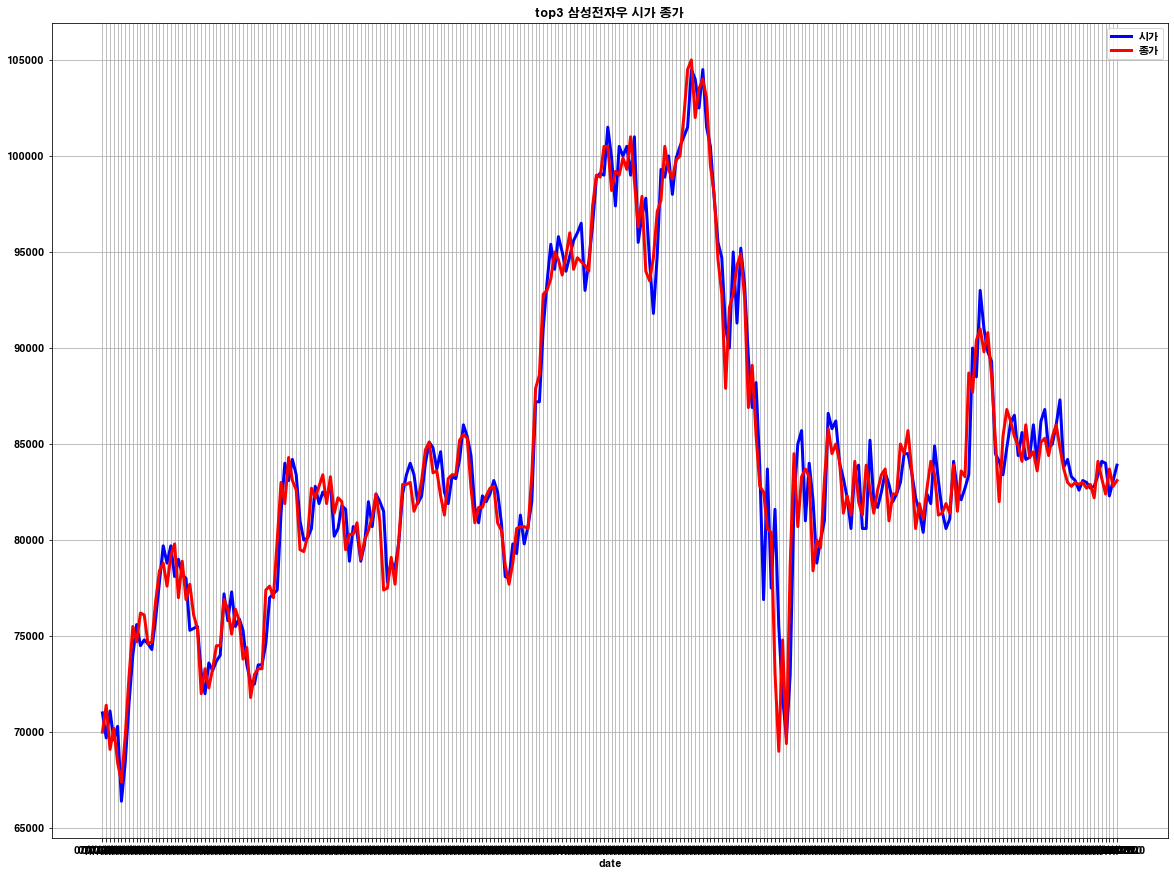

In [38]:
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

plt.plot(data_skh['date'],data_skh['종목시가'],'b',label='시가')
plt.plot(data_skh['date'],data_skh['종목종가'],'r',label='종가')

plt.xlabel('date')
plt.title('top3 삼성전자우 시가 종가')

plt.legend(loc='upper right')

plt.show()

#### 저가 고가 비교

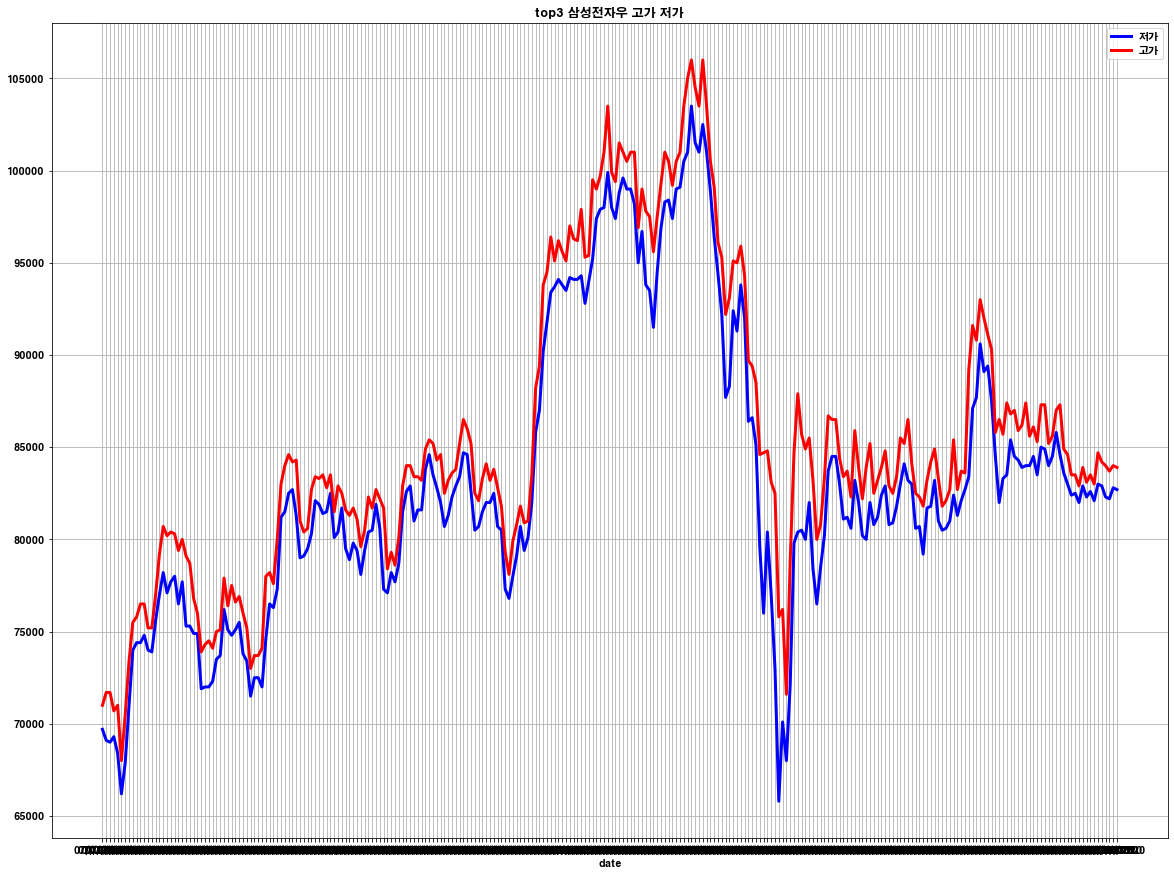

In [39]:
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

plt.plot(data_skh['date'],data_skh['종목저가'],'b',label='저가')
plt.plot(data_skh['date'],data_skh['종목고가'],'r',label='고가')

plt.xlabel('date')
plt.title('top3 삼성전자우 고가 저가')

plt.legend(loc='upper right')

plt.show()

----------------------------------------------------------------------

> # 6. 전처리 및 feature 추가하기

## -변동성

그 그룹이 매수했던 기간의 변동성으로 (?)

In [40]:
#변동성1 = 고가 - 저가
data_s['변동성1'] = abs(data_s['종목고가'] - data_s['종목저가'])
#변동성2 = 고가 - 종가
data_s['변동성2'] = abs(data_s['종목고가'] - data_s['종목종가'])
#변동성3 = 고가 - 시가
data_s['변동성3'] = abs(data_s['종목고가'] - data_s['종목시가'])
#변동성4 = 시가 - 종가
data_s['변동성4'] = abs(data_s['종목시가'] - data_s['종목종가'])
#변동성5 = 시가 - 저가
data_s['변동성5'] = abs(data_s['종목시가'] - data_s['종목저가'])
#변동성6 = 종가 - 저가
data_s['변동성6'] = abs(data_s['종목종가'] - data_s['종목저가'])

#이중 가장 큰 것 변동성column 으로 추가

## - RMF

# ++

#### 조사하다보면 그룹별로 특성이 나올것..
#### - 조사하면서 여러가지 feature 추가
#### -  모델 예측
#### - 이 과정을 각 그룹별로 진행할 수 있게 함수화

---------------------------------

# 함수화

In [41]:
for i in group:
    print("group  <",i, ">")
    df = data_trade[data_trade['그룹번호']==i]
    
    # 1. 총 기간 top3목록
    df1 = pd.DataFrame(df.groupby(['종목번호'])['매수고객수'].sum())   # 종목별로 매수고객수의 합
    df1 = df1.sort_values(by=['매수고객수'], ascending=False).head(3)     # top3
    df1 = pd.merge(df1, stock_feature, on="종목번호", how="left")         # 종목특성 merge
    print("총 기간 top3 목록  : " , df1['종목명'].tolist())
    
    ####################################
    
    # 2. 기준 년월 별 top3목록
    df2 = df.sort_values(by="매수고객수", ascending=False).groupby("기준년월").head(3)  #'기준년월' 기준으로 grouping 한뒤 매수고객수가 가장 많은 종목 top3
    df2 = df2.sort_values(by=["기준년월","매수고객수"]) #기준년월, 매수고객수 순으로 정렬
    df2 = df2.reset_index(drop=True)                #다시 인덱싱
    df2 = df2[['기준년월','종목번호','매수고객수']] #필요 column만 추출
    df2 = pd.merge(df2, stock_feature, on="종목번호", how="left")  #각 종목 특성 가져옴
    
    #각 기간별 top3 확인
    # top3 column
    date=df2['기준년월'].unique().tolist()
    l=[]
    for p in date :
        k=1
        for j in range(len(df2)):
            if df2.iloc[j]['기준년월']==p:
                l.append(k)
                k=k+1    
            else:
                continue;
    df2['top3']=l
    
    #top1
    top1 = df2[df2['top3']==1]
    top1 = pd.DataFrame(top1.groupby(['종목명'])['종목번호'].count())
    top1 = top1.sort_values(by='종목번호', ascending=False)
    #top2
    top2 = df2[df2['top3']==2]
    top2 = pd.DataFrame(top2.groupby(['종목명'])['종목번호'].count())
    top2 = top2.sort_values(by='종목번호', ascending=False)
    #top3
    top3 = df2[df2['top3']==3]
    top3 = pd.DataFrame(top3.groupby(['종목명'])['종목번호'].count())
    top3 = top3.sort_values(by='종목번호', ascending=False)
    
    #각 기간별 top3 결과
    By_period_top3 = [top1.index[0], top2.index[0], top3.index[0]]
    
    print("각 기간별 top3 목록  : " , By_period_top3)
    print("\n")
    
    #break;

group  < MAD01 >
총 기간 top3 목록  :  ['삼성전자', 'SK하이닉스', '삼성전자우']
각 기간별 top3 목록  :  ['삼성전자우', 'SK하이닉스', '삼성전자']


group  < MAD02 >
총 기간 top3 목록  :  ['삼성전자', 'KB금융', '미래에셋대우']
각 기간별 top3 목록  :  ['신한지주', '미래에셋대우', '삼성전자']


group  < MAD03 >
총 기간 top3 목록  :  ['신풍제약', '삼성전자', '신라젠']
각 기간별 top3 목록  :  ['국일제지', '신풍제약', '신라젠']


group  < MAD04 >
총 기간 top3 목록  :  ['삼성전자', 'SK하이닉스', '셀트리온']
각 기간별 top3 목록  :  ['셀트리온', 'SK하이닉스', '삼성전자']


group  < MAD05 >
총 기간 top3 목록  :  ['삼성전자', '카카오', '셀트리온']
각 기간별 top3 목록  :  ['에이치엘비', '셀트리온', '삼성전자']


group  < MAD06 >
총 기간 top3 목록  :  ['삼성전자', '카카오', 'SK하이닉스']
각 기간별 top3 목록  :  ['NAVER', 'SK하이닉스', '삼성전자']


group  < MAD07 >
총 기간 top3 목록  :  ['삼성전자', 'SK이노베이션', 'SOil']
각 기간별 top3 목록  :  ['SK하이닉스', 'SK이노베이션', '삼성전자']


group  < MAD08 >
총 기간 top3 목록  :  ['삼성전자', '남선알미늄', '신풍제약']
각 기간별 top3 목록  :  ['남선알미늄', '국일제지', '삼성전자']


group  < MAD09 >
총 기간 top3 목록  :  ['삼성전자', '카카오', '삼성바이오로직스']
각 기간별 top3 목록  :  ['카카오', 'SK하이닉스', '삼성전자']


group  < MAD10 >
총 기간 top3 목록  :  